## Primer 1. Facility location

U opstem slucaju, problem eng. *Facility location* predstavlja problem nalazenja optimalne lokacije ustanova kako bi se minimizovao odredjeni trosak (npr. udaljenost do nje).
Tehnike resavanja ovog problema su primenljive i za klasterovanje podataka. <br />

Funkcija *Facility location* je submodularna funkcija nad skupom elemenata, gde se moze definisati funkcija slicnosti izmedju dva elementa. Veoma je primenljiva jer se njenom optimizacijom se izdvaja podskup elemenata koji dobro predstavlja originalni skup.
Njenom optimizacijom se maksimizuje slicnost izmedju elemenata originalnog skupa i elemenata izabranog podskupa. <br />
Funkcija koja racuna slicnost dva elementa mora biti nenegativna, a njena veca vrednost znaci da su elementi slicniji. Jedan primer je funkcija euklidskog rastojanja.

Opsti oblik funkcije:

$f(X,Y)=\displaystyle \sum_{y \in Y} \max_{x \in X} \phi(x,y)$

gde je $f$ funkcija, $X \subseteq Y$, $Y$ ceo skup, a $\phi$ je funkcija slicnosti dva elementa.


Optimizacija funkcije *facility location* je NP tezak problem. Za resavanje se koristi pohlepna implementacija algoritma k-medioda (slican k-means algoritmu). <br />
*Def.* Medioda skupa je objekat tog skupa cija je prosecna slicnost ostalim elementima skupa minimalna (tj. to je centralna tacka u klasteru).

Ova funkcija koristi matricu slicnosti elemenata.<br />
Implementacija selektora *FacilityLocationSelection* u paketu Apricot daje mogucnost korisniku da sam izracuna i prosledi simetricnu kvadratnu matricu slicnosti elemenata, ili da prosledi ceo skup podataka i funkciju koja racuna slicnost dva elementa.
U narednom primeru, prosledjuje se ceo skup podataka, i bira se funkcija euklidskog rastojanja. <br />
Kako je neophodno izracunati matricu slicnosti elemenata, potrebno je $n^2$ memorije gde je $n$ broj elemenata, sto moze predstavljati problem prilikom rada sa velikim skupom podataka.

In [1]:
from apricot import FacilityLocationSelection
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt

In [2]:
data = load_digits()

In [3]:
print('Data shape: ', data.data.shape)

Data shape:  (1797, 64)


<Figure size 432x288 with 0 Axes>

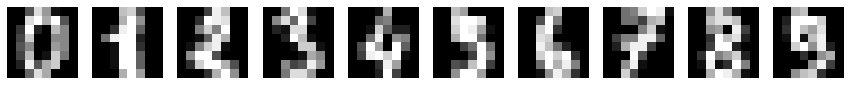

In [4]:
# Showing first 10 elements of the dataset.
plt.gray()
fig, axs = plt.subplots(1, 10, figsize=(15, 3))
for i in range(0, 10):
    axs[i].matshow(data.images[i])
    axs[i].axis('off')
plt.show()

In [5]:
X = data.data[:1250]

In [6]:
# Primer a:
# Biram reprezentativni podskup sa 100 elemenata.
n_samples = 100

In [7]:
selector = FacilityLocationSelection(n_samples, metric='euclidean', optimizer='lazy', verbose=False)
selector.fit(X)

In [8]:
X_subset = selector.transform(X)

In [9]:
X_subset.shape

(100, 64)

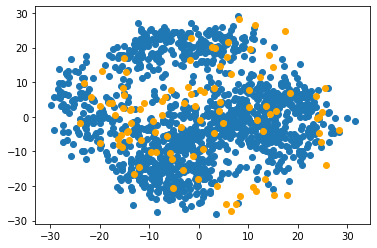

In [10]:
# Vizualizujem izabrani podskup (koristim PCA za smanjenje dimenzionalnosti)
from sklearn.decomposition import PCA
X_reduced = PCA(n_components=2).fit_transform(X)
X_subset_reduced = PCA(n_components=2).fit_transform(X_subset)

# Ceo skup
plt.scatter(X_reduced[:, 0], X_reduced[:, 1])

# Podskup
plt.scatter(X_subset_reduced[:, 0], X_subset_reduced[:, 1], color='orange')

plt.show()

In [11]:
# Primer b:
# Biram reprezentativni podskup sa samo 10 elemenata - 10 cifara
n_samples_10 = 10

In [12]:
selector_10 = FacilityLocationSelection(n_samples_10, metric='euclidean', optimizer='lazy', verbose=False)
selector_10.fit(X)

In [13]:
X_subset_10 = selector_10.transform(X)

In [14]:
X_subset_10.shape

(10, 64)

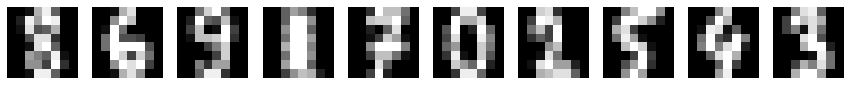

In [15]:
# Iscrtavam izabrani podskup slika
fig, axs = plt.subplots(1, n_samples_10, figsize=(15, 3))
for i in range(0, n_samples_10):
    axs[i].imshow(X_subset_10[i].reshape((8,8)))
    axs[i].axis('off')
plt.show()

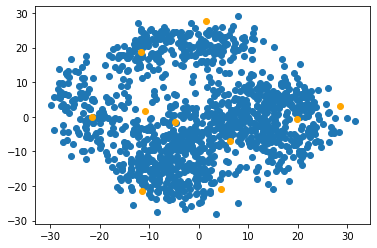

In [16]:
# Vizualizujem izabrani podskup od 10 elemenata.
from sklearn.decomposition import PCA
X_reduced = PCA(n_components=2).fit_transform(X)
X_subset_10_reduced = PCA(n_components=2).fit_transform(X_subset_10)

# Ceo skup
plt.scatter(X_reduced[:, 0], X_reduced[:, 1])

# Podskup
plt.scatter(X_subset_10_reduced[:, 0], X_subset_10_reduced[:, 1], color='orange')

plt.show()